In [300]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import sigutils
import lockin

# Change frequency without filtering

$y = A x$

In [301]:
omega = np.pi/4
omegaR = np.pi/4
N = 32
i = np.arange(N)
signal = 1 + np.exp(-25*(i-18)**2/N**2)*0.5
y = (np.cos(np.arctan2(0.5, 1)) *np.cos(omega * i) - np.sin(np.arctan2(0.5, 1)) * np.sin(omega * i)) * signal

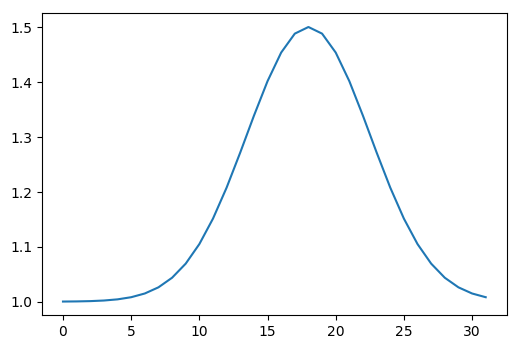

In [3]:
plt.plot(signal)

In [252]:
A = np.c_[np.diag(np.cos(omegaR*i)), np.diag(np.sin(omegaR*i))]
u, s, vh = linalg.svd(A)
Ainv = np.dot(vh.T, np.dot(linalg.diagsvd(1.0/s, *A.T.shape), u.T))
yinv = np.dot(Ainv, y)
h = np.array([0.25, 0.25, 0.25, 0.25])
ivalid = np.convolve(i, h, mode='valid')
X = np.convolve(yinv[:N], h, mode='valid')
Y = np.convolve(yinv[N:], h, mode='valid')

In [8]:
plt.rc('font', size=11)
plt.rc('figure', figsize=(3, 2.5))

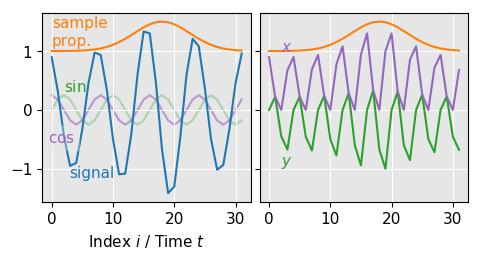

In [18]:
# fig = plt.figure()
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(5.5, 2.5), sharex=True, sharey=True, subplot_kw=dict(facecolor='0.9'))
fig.subplots_adjust(wspace=0.04)
ax.grid(color='1', zorder=0)
ax2.grid(color='1', zorder=0)
line, = ax.plot(i, y, zorder=5)
line_in, = ax.plot(i, signal, zorder=2.5)
line2, = ax.plot(i, np.sin(omega*i)*0.25, zorder=1, alpha=0.3)
ax.plot(0,0)
line3, = ax.plot(i, np.cos(omega*i)*0.25, zorder=1, alpha=0.6)
ax2.plot(i, signal, zorder=2.5, color=line_in.get_color())
ax2.plot(i, yinv[N:], color=line2.get_color())
ax2.plot(i, yinv[:N], color=line3.get_color())
ax2.text(2, 1, '$x$', color=line3.get_color())
ax2.text(2, -0.95, "$y$", color=line2.get_color())
ax.text(2.8, -1.15, 'signal', color=line.get_color())
ax.text(0, 1.1, 'sample\nprop.', color=line_in.get_color())
ax.text(2, 0.32, '$\sin$', color=line2.get_color())
ax.text(-0.6, -0.55, '$\cos$', color=line3.get_color(), bbox=dict(facecolor='0.9', alpha=0.35, edgecolor='none'), zorder=10)
ax.set_xlabel("Index $i$ / Time $t$")

In [19]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/signal.pdf', bbox_inches='tight')

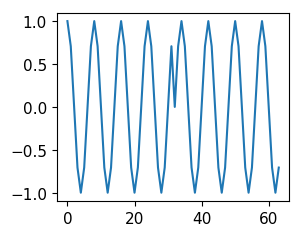

In [365]:
plt.plot(np.dot(Ainv, np.ones_like(y)))

In [46]:
X_full = np.convolve(yinv[:N], h)
Y_full = np.convolve(yinv[N:], h)

In [48]:
X_full

array([ 0.22364783,  0.27957364,  0.27957364,  0.44762377,  0.44851661,
        0.44894385,  0.44894385,  0.45296967,  0.46176698,  0.4651843 ,
        0.4651843 ,  0.48616324,  0.52285695,  0.53417006,  0.53417006,
        0.57613191,  0.63110831,  0.64320324,  0.64320324,  0.65772175,
        0.65772175,  0.65288225,  0.65288225,  0.61659743,  0.56162104,
        0.54763376,  0.54763376,  0.5136944 ,  0.4770007 ,  0.47000772,
        0.47000772,  0.45975576,  0.22641778,  0.16905913,  0.16905913])

(-3, 34)

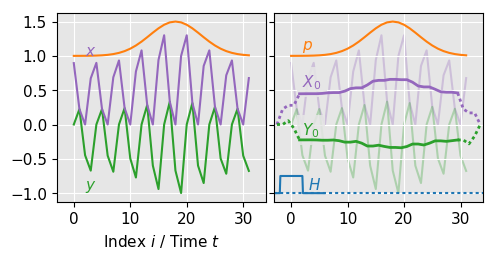

In [70]:
# fig = plt.figure()
fig, (ax2, ax) = plt.subplots(ncols=2,figsize=(5.5, 2.5), sharex=True, sharey=True, subplot_kw=dict(facecolor='0.9'))
fig.subplots_adjust(wspace=0.04)
ax.grid(color='1', zorder=0)
ax2.grid(color='1', zorder=0)
ax2.plot(i, signal, zorder=2.5, color=line_in.get_color())
ax2.plot(i, yinv[N:], color=line2.get_color())
ax2.plot(i, yinv[:N], color=line3.get_color())
ax2.text(2, 1, '$x$', color=line3.get_color())
ax2.text(2, -0.95, "$y$", color=line2.get_color())
ax2.set_xlabel("Index $i$ / Time $t$")


ax.plot(i, signal, zorder=2.5, color=line_in.get_color())
l1, = ax.plot(i, yinv[:N], color=line3.get_color(), alpha=0.3, zorder=0)
l2, = plt.plot(i, yinv[N:], color=line2.get_color(), alpha=0.3, zorder=0)
plt.plot(np.arange(-2.5, 1.6, 1), np.r_[0,X_full[:4]], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
plt.plot(ivalid[-1]+np.arange(5), np.r_[X_full[-4:],0], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
plt.plot(ivalid, X,
         color=l1.get_color(),
         linewidth=2, zorder=10)
plt.plot(np.arange(-2.5, 1.6, 1), np.r_[0,Y_full[:4]], color=l2.get_color(), linewidth=2,
        linestyle=':', zorder=10)
plt.plot(ivalid[-1]+np.arange(5), np.r_[Y_full[-4:],0], color=l2.get_color(), linewidth=2,
         linestyle=':', zorder=10)
plt.plot(ivalid, Y, color=l2.get_color(), linewidth=2, zorder=10)
i_filt = np.arange(-1, 8, 0.1)
ht = np.where(np.logical_and(i_filt >=0, i_filt < 4), 0.25, 0)
l_ht, = ax.plot(i_filt-2, ht - 1)
ax.axhline(-1, color=l_ht.get_color(), linestyle=':')
ax.text(2, 1.1, "$p$", color=line_in.get_color())
ax.text(3, -0.95, "$H$", color=l_ht.get_color())
ax.text(2, 0.55, "$X_0$", color=line3.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.text(2, -0.15, "$Y_0$", color=line2.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.set_xlim(-3, 34)
# plt.plot(i, np.cos(i*omega) * y)
# plt.plot(i, np.sin(i*omega) * y)

In [71]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/signal-filtered.pdf', bbox_inches='tight')

(-3, 34)

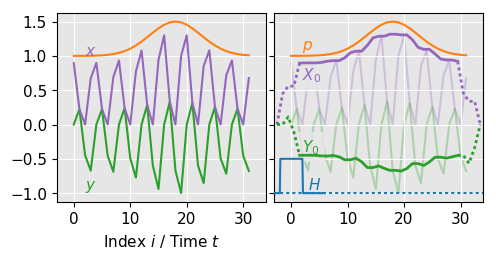

In [80]:
fig, (ax2, ax) = plt.subplots(ncols=2,figsize=(5.5, 2.5), sharex=True, sharey=True, subplot_kw=dict(facecolor='0.9'))
fig.subplots_adjust(wspace=0.04)
ax.grid(color='1', zorder=0)
ax2.grid(color='1', zorder=0)
ax2.plot(i, signal, zorder=2.5, color=line_in.get_color())
ax2.plot(i, yinv[N:], color=line2.get_color())
ax2.plot(i, yinv[:N], color=line3.get_color())
ax2.text(2, 1, '$x$', color=line3.get_color())
ax2.text(2, -0.95, "$y$", color=line2.get_color())
ax2.set_xlabel("Index $i$ / Time $t$")


ax.plot(i, signal, zorder=2.5, color=line_in.get_color())
l1, = ax.plot(i, yinv[:N], color=line3.get_color(), alpha=0.3, zorder=0)
l2, = plt.plot(i, yinv[N:], color=line2.get_color(), alpha=0.3, zorder=0)
plt.plot(np.arange(-2.5, 1.6, 1), np.r_[0,X_full[:4]*2], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
plt.plot(ivalid[-1]+np.arange(5), np.r_[X_full[-4:]*2,0], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
plt.plot(ivalid, X*2,
         color=l1.get_color(),
         linewidth=2, zorder=10)
plt.plot(np.arange(-2.5, 1.6, 1), np.r_[0,Y_full[:4]*2], color=l2.get_color(), linewidth=2,
        linestyle=':', zorder=10)
plt.plot(ivalid[-1]+np.arange(5), np.r_[Y_full[-4:]*2,0], color=l2.get_color(), linewidth=2,
         linestyle=':', zorder=10)
plt.plot(ivalid, Y*2, color=l2.get_color(), linewidth=2, zorder=10)
i_filt = np.arange(-1, 8, 0.1)
ht = np.where(np.logical_and(i_filt >=0, i_filt < 4), 0.25, 0, )
l_ht, = ax.plot(i_filt-2, ht*2 - 1,zorder=9)
ax.axhline(-1, color=l_ht.get_color(), linestyle=':')
ax.text(2, 1.1, "$p$", color=line_in.get_color())
ax.text(3, -0.95, "$H$", color=l_ht.get_color())
ax.text(2, 0.65, "$X_0$", color=line3.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.text(2, -0.4, "$Y_0$", color=line2.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.set_xlim(-3, 34)

In [81]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/signal-filtered-scaled.pdf', bbox_inches='tight')

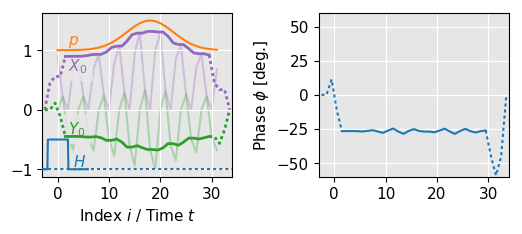

In [214]:
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(5.5, 2.5), sharex=True, sharey=False, subplot_kw=dict(facecolor='0.9'))
# fig.subplots_adjust(wspace=0.04)
ax.grid(color='1', zorder=0)
ax2.grid(color='1', zorder=0)

ax.set_xlabel("Index $i$ / Time $t$")


ax.plot(i, signal, zorder=2.5, color=line_in.get_color())
l1, = ax.plot(i, yinv[:N], color=line3.get_color(), alpha=0.3, zorder=0)
l2, = ax.plot(i, yinv[N:], color=line2.get_color(), alpha=0.3, zorder=0)
ax.plot(np.arange(-2.5, 1.6, 1), np.r_[0,X_full[:4]*2], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
ax.plot(ivalid[-1]+np.arange(5), np.r_[X_full[-4:]*2,0], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
ax.plot(ivalid, X*2,
         color=l1.get_color(),
         linewidth=2, zorder=10)
ax.plot(np.arange(-2.5, 1.6, 1), np.r_[0,Y_full[:4]*2], color=l2.get_color(), linewidth=2,
        linestyle=':', zorder=10)
ax.plot(ivalid[-1]+np.arange(5), np.r_[Y_full[-4:]*2,0], color=l2.get_color(), linewidth=2,
         linestyle=':', zorder=10)
ax.plot(ivalid, Y*2, color=l2.get_color(), linewidth=2, zorder=10)
i_filt = np.arange(-1, 8, 0.1)
ht = np.where(np.logical_and(i_filt >=0, i_filt < 4), 0.25, 0, )
l_ht, = ax.plot(i_filt-2, ht*2 - 1,zorder=9)
ax.axhline(-1, color=l_ht.get_color(), linestyle=':')
ax.text(2, 1.1, "$p$", color=line_in.get_color())
ax.text(3, -0.95, "$H$", color=l_ht.get_color())
ax.text(2, 0.65, "$X_0$", color=line3.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.text(2, -0.4, "$Y_0$", color=line2.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.set_xlim(-3, 34)

ax2.plot(np.arange(-2.5, 1.6, 1), np.degrees(np.arctan2(np.r_[0,Y_full[:4]], np.r_[0, X_full[:4]])),
         color=l_ht.get_color(), linestyle=':',)
ax2.plot(ivalid[-1]+np.arange(5), np.degrees(np.arctan2(np.r_[Y_full[-4:], 0], np.r_[X_full[-4:], 0])),
         color=l_ht.get_color(), linestyle=':',)
ax2.plot(ivalid, np.degrees(np.arctan2(Y, X)))

ax2.set_ylim(-60, 60)
# ax2.set_yticks([-90, -45, 0, 45, 90])
ax2.set_ylabel(("Phase $\phi$ [deg.]"))
fig.tight_layout()

In [130]:
phase = np.arctan2(Y, X)
phi_m = np.mean(phase)
np.degrees(phi_m)

-26.561185931068238

In [215]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/signal-phase.pdf', bbox_inches='tight')

In [144]:
Z0 = X + 1j * Y
Z = 2 * Z0 * np.exp(-1j*phi_m)
Z_full = 2 * (X_full + 1j * Y_full) * np.exp(-1j*phi_m)

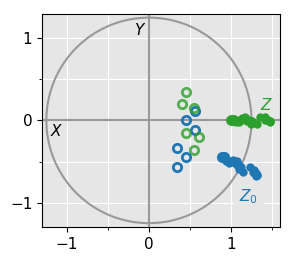

In [174]:
fig, ax2 = plt.subplots(figsize=(2.75*2.9/2.6, 2.75), sharex=False, sharey=False, subplot_kw=dict(facecolor='0.9'))
# fig.subplots_adjust(wspace=0.04)
ax2.set_yticks([-1, 0, 1])
ax2.set_yticks([-1.5, -0.5, 0.5, 1.5], minor=True)
ax2.set_xticks([-1, 0, 1])
ax2.set_xticks([-1.5, -0.5, 0.5, 1.5], minor=True)
ax2.grid(color='1', zorder=0, which='both')

# ax2.plot()
# ax2.plot()
ax2.axhline(color='0.6')
ax2.axvline(color='0.6')
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)*1.25
y = np.sin(t)*1.25
ax2.plot(x, y, color='0.6')

ax2.text(1.1, -0.98, "$Z_0$", color=l_ht.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax2.text(1.35, 0.13, "$Z$", color=line2.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))

ax2.plot(X_full[:4]*2, Y_full[:4]*2, 'o', mew=2, mfc='none',  markeredgecolor=l_ht.get_color())
ax2.plot(X_full[-4:]*2, Y_full[-4:]*2, 'o', mew=2, mfc='none',  markeredgecolor=l_ht.get_color())
ax2.plot(X*2, Y*2, 'o', mew=0,color=l_ht.get_color(), zorder=10)

ax2.plot(Z_full.real[:4], Z_full.imag[:4], 'o', mew=2, mfc='none',  markeredgecolor=line2.get_color(), alpha=0.8)
ax2.plot(Z_full.real[-4:], Z_full.imag[-4:], 'o', mew=2, mfc='none',  markeredgecolor=line2.get_color(), alpha=0.8)
ax2.plot(Z.real, Z.imag, 'o', mew=0, color=line2.get_color(), zorder=11)




ax2.set_xlim(-1.3, 1.6)
ax2.set_ylim(-1.3, 1.3)
ax2.text(-1.2, -0.19, "$X$", color='k')
ax2.text(-0.18, 1.04, "$Y$", color='k')



# ax2.set_ylim(-60, 60)
# ax2.set_yticks([-90, -45, 0, 45, 90])
# ax2.set_ylabel(("Phase [deg.]"))
fig.tight_layout()

In [175]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/phase.pdf', bbox_inches='tight')

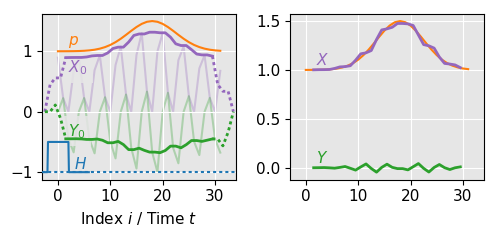

In [212]:
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(5.25, 2.5), sharex=True, sharey=False, subplot_kw=dict(facecolor='0.9'))
# fig.subplots_adjust(wspace=0.04)
ax.grid(color='1', zorder=0)
ax2.grid(color='1', zorder=0)

ax.set_xlabel("Index $i$ / Time $t$")


ax.plot(i, signal, zorder=2.5, color=line_in.get_color())
l1, = ax.plot(i, yinv[:N], color=line3.get_color(), alpha=0.3, zorder=0)
l2, = ax.plot(i, yinv[N:], color=line2.get_color(), alpha=0.3, zorder=0)
ax.plot(np.arange(-2.5, 1.6, 1), np.r_[0,X_full[:4]*2], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
ax.plot(ivalid[-1]+np.arange(5), np.r_[X_full[-4:]*2,0], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
ax.plot(ivalid, X*2,
         color=l1.get_color(),
         linewidth=2, zorder=10)
ax.plot(np.arange(-2.5, 1.6, 1), np.r_[0,Y_full[:4]*2], color=l2.get_color(), linewidth=2,
        linestyle=':', zorder=10)
ax.plot(ivalid[-1]+np.arange(5), np.r_[Y_full[-4:]*2,0], color=l2.get_color(), linewidth=2,
         linestyle=':', zorder=10)
ax.plot(ivalid, Y*2, color=l2.get_color(), linewidth=2, zorder=10)
i_filt = np.arange(-1, 8, 0.1)
ht = np.where(np.logical_and(i_filt >=0, i_filt < 4), 0.25, 0, )
l_ht, = ax.plot(i_filt-2, ht*2 - 1,zorder=9)
ax.axhline(-1, color=l_ht.get_color(), linestyle=':')
ax.text(2, 1.1, "$p$", color=line_in.get_color())
ax.text(3, -0.95, "$H$", color=l_ht.get_color())
ax.text(2, 0.65, "$X_0$", color=line3.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.text(2, -0.4, "$Y_0$", color=line2.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
ax.set_xlim(-3, 34)

ax2.plot(i, signal, zorder=2.5, color=line_in.get_color())
ax2.plot(ivalid, Z.real, color=line3.get_color(), linewidth=2, zorder=4)
ax2.plot(ivalid, Z.imag, color=line2.get_color(), linewidth=2)

ax2.text(2, 1.05, "$X$", color=line3.get_color(), )
ax2.text(2, 0.05, "$Y$", color=line2.get_color(), )

# ax2.plot(np.arange(-2.5, 1.6, 1), np.degrees(np.arctan2(np.r_[0,Y_full[:4]], np.r_[0, X_full[:4]])),
#          color=l_ht.get_color(), linestyle=':',)
# ax2.plot(ivalid[-1]+np.arange(5), np.degrees(np.arctan2(np.r_[Y_full[-4:], 0], np.r_[X_full[-4:], 0])),
#          color=l_ht.get_color(), linestyle=':',)
# ax2.plot(ivalid, np.degrees(np.arctan2(Y, X)))

# ax2.set_ylim(-60, 60)
# # ax2.set_yticks([-90, -45, 0, 45, 90])
# ax2.set_ylabel(("Phase [deg.]"))
fig.tight_layout()

In [213]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/signal-phased.pdf', bbox_inches='tight')

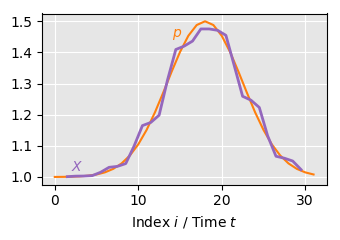

In [357]:
fig, ax2 = plt.subplots(figsize=(3.5, 2.5), sharex=True, sharey=False, subplot_kw=dict(facecolor='0.9'))
# fig.subplots_adjust(wspace=0.04)
ax2.set_xlabel("Index $i$ / Time $t$")
ax2.grid(color='1', zorder=0)

# ax.set_xlabel("Index $i$ / Time $t$")


# ax.plot(i, signal, zorder=2.5, color=line_in.get_color())
# l1, = ax.plot(i, yinv[:N], color=line3.get_color(), alpha=0.3, zorder=0)
# l2, = ax.plot(i, yinv[N:], color=line2.get_color(), alpha=0.3, zorder=0)
# ax.plot(np.arange(-2.5, 1.6, 1), np.r_[0,X_full[:4]*2], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
# ax.plot(ivalid[-1]+np.arange(5), np.r_[X_full[-4:]*2,0], color=l1.get_color(), linewidth=2, linestyle=':', zorder=10)
# ax.plot(ivalid, X*2,
#          color=l1.get_color(),
#          linewidth=2, zorder=10)
# ax.plot(np.arange(-2.5, 1.6, 1), np.r_[0,Y_full[:4]*2], color=l2.get_color(), linewidth=2,
#         linestyle=':', zorder=10)
# ax.plot(ivalid[-1]+np.arange(5), np.r_[Y_full[-4:]*2,0], color=l2.get_color(), linewidth=2,
#          linestyle=':', zorder=10)
# ax.plot(ivalid, Y*2, color=l2.get_color(), linewidth=2, zorder=10)
# i_filt = np.arange(-1, 8, 0.1)
# ht = np.where(np.logical_and(i_filt >=0, i_filt < 4), 0.25, 0, )
# l_ht, = ax.plot(i_filt-2, ht*2 - 1,zorder=9)
# ax.axhline(-1, color=l_ht.get_color(), linestyle=':')
# ax.text(2, 1.1, "$p$", color=line_in.get_color())
# ax.text(3, -0.95, "$H$", color=l_ht.get_color())
# ax.text(2, 0.65, "$X_0$", color=line3.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
# ax.text(2, -0.4, "$Y_0$", color=line2.get_color(), bbox=dict(facecolor='0.9', alpha=0.85, edgecolor='none'))
# ax.set_xlim(-3, 34)

ax2.text(2, 1.02, "$X$", color=line3.get_color(), )
ax2.text(14, 1.45, "$p$", color=line_in.get_color())
ax2.plot(i, signal, zorder=2.5, color=line_in.get_color())
ax2.plot(ivalid, Z.real, color=line3.get_color(), linewidth=2, zorder=4)

# ax2.plot(ivalid, Z.imag, color=line2.get_color(), linewidth=2)

# ax2.plot(np.arange(-2.5, 1.6, 1), np.degrees(np.arctan2(np.r_[0,Y_full[:4]], np.r_[0, X_full[:4]])),
#          color=l_ht.get_color(), linestyle=':',)
# ax2.plot(ivalid[-1]+np.arange(5), np.degrees(np.arctan2(np.r_[Y_full[-4:], 0], np.r_[X_full[-4:], 0])),
#          color=l_ht.get_color(), linestyle=':',)
# ax2.plot(ivalid, np.degrees(np.arctan2(Y, X)))

# ax2.set_ylim(-60, 60)
# # ax2.set_yticks([-90, -45, 0, 45, 90])
# ax2.set_ylabel(("Phase [deg.]"))
fig.tight_layout()

In [358]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/signal-X.pdf', bbox_inches='tight')

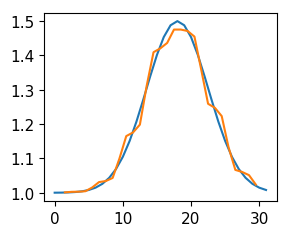

In [367]:
plt.plot(signal)
plt.plot(ivalid, abs(X + 1j*Y)*2)

In [273]:
L = np.zeros((N, N))
for j in xrange(N):
    for k in xrange(N):
        if k == 0:
            L[j,k] = 1000.0
        elif j >= k:
            L[j,k] = 1.0

In [274]:
Ax = np.diag(np.cos(omegaR*i))
Ay = np.diag(np.sin(omegaR*i))

In [275]:
Ader = np.c_[np.dot(Ax, L), np.dot(Ay, L)]

In [276]:
out = linalg.lstsq(Ader, y)
XYder = out[0]

In [277]:
Asmall = np.c_[Ax[:8, :8], Ay[:8, :8]]

In [278]:
np.set_printoptions(precision=1)

In [279]:
np.set_printoptions(precision=1, linewidth=200, suppress=True)
print(Asmall)

[[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.7  0.   0.   0.   0.   0.   0.   0.   0.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.7  0.   0.   0.   0.   0.   0.   0.   0.7  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.7  0.   0.   0.   0.   0.   0.   0.  -0.7  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.7  0.   0.   0.   0.   0.   0.   0.  -0.7]]


In [280]:
print(linalg.pinv(Asmall))

[[ 1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.7  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.7  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.7]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.7  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.7  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.7]]


Would it be better to minimize the 1-norm?

In [ ]:
mpl.gridspec.GridSpec()

In [323]:
z = np.dot(L, XYder[:N]) + 1j*np.dot(L, XYder[N:])
zz = z * np.exp(-1j*phi_m)

(-6, 6)

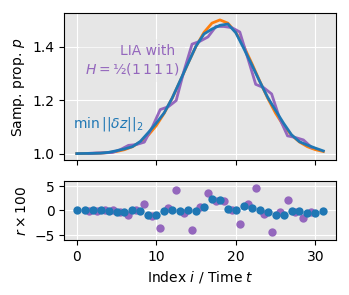

In [362]:
# plt.plot(i, np.cumsum(XYder[:N]))
# plt.plot(i, np.cumsum(XYder[N:]))
fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(3.5, 3.0), gridspec_kw=dict(height_ratios=(2.5, 1)), sharex=True, sharey=False, subplot_kw=dict(facecolor='0.9'))
# fig.subplots_adjust(wspace=0.04)
ax2.set_xlabel("Index $i$ / Time $t$")
ax.grid(color='1', zorder=0)
ax2.grid(color='1', zorder=0)


t1 = ax.text(1, 1.3, u'        LIA with\n$H = ½(1 \\, 1 \\, 1 \\, 1)$', color=line3.get_color(),
        bbox=dict(facecolor='0.9', alpha=0.35, edgecolor='none'))
ax.text(-0.5, 1.1, u'$\\min \\, ||\\delta z||_{2}$', color=l_ht.get_color())
ax.plot(i, signal, linewidth=2, color=line_in.get_color(), zorder = t1.get_zorder() + 1)
ax.plot(i, zz.real, linewidth=2, zorder = t1.get_zorder() + 3)
ax.plot(ivalid, Z.real, color=line3.get_color(), zorder = t1.get_zorder() + 2, linewidth=2)

ax2.plot(ivalid, 100*(np.convolve(signal, np.array([0.5, 0.5]),mode='valid')[1:-1] - Z.real),
         'o', mew=0, color=line3.get_color())
ax2.plot(i, (signal - zz.real)*100, 'o', mew=0)
ax.set_ylabel("Samp. prop. $p$")
ax2.set_ylabel("$r \\times 100$")
ax2.set_ylim(-6, 6)
# ax.plot(i, zz.imag, '--')

In [363]:
fig.savefig('/Users/ryandwyer/Research/Talks/1703-digital-lock-in-amplifier/beamer/figs/LIA-norm.pdf', bbox_inches='tight')

In [ ]:
fig.savefig('')

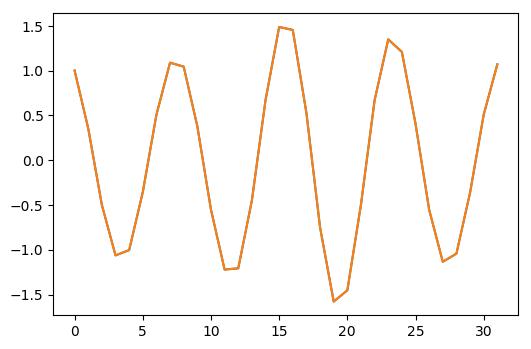

In [259]:
plt.plot(i, y)
plt.plot(i, np.dot(Ader, XYder))
